# Cheat sheet for matplotlib

*No BS, just essential matplotlib!*

**By Ville Voutilainen**

Tested on [my custom conda environment](https://github.com/NoobQuant/dsenvs/blob/main/condaenv.md) *dev2021b*.

## Module load

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import display

In [2]:
print("matplotlib version {}".format(matplotlib.__version__))

matplotlib version 3.4.3


## Matplotlib basics

### Line chart with many custom options

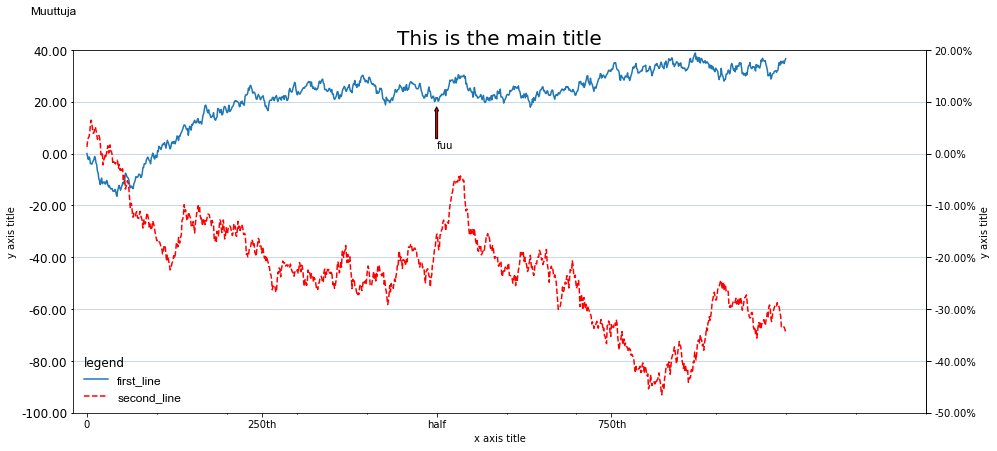

In [3]:
plt.close('all')

########################################
# Data
########################################
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

########################################
# Plot
########################################

#################
# Figure skeleton
#################
# Figure
fig = plt.figure(figsize=(15,7))
# Primray axes
ax1 = fig.add_subplot(1,1,1)

# Secondary axes with shared x-axis
ax2 = ax1.twinx()
# Hide second axes spines except for right
ax2.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)

#################
# Plot lines
#################
# First line
lns1 = ax1.plot(x,y1, label = 'first_line')
# Second line with second y-axis
lns2 = ax2.plot(x,y2,'--',color = 'r', label = 'second_line')

#################
# View limits
#################
# Set primary axes x-axis limit
ax1.set_xlim(-20,1200)

# Set primary axes y-axis limit
ax1.set_ylim(-100,40)

# Set secondary axes y-axis limit
ax2.set_ylim(-50,20)

#################
# Main title
#################
ax1.set_title('This is the main title', fontsize = 20)

#################
# Primary axes x-axis
#################

# Set x-axis label
ax1.set_xlabel('x axis title')

# x-axis major ticks and labels as fixed
ax1.xaxis.set_major_locator(ticker.FixedLocator((np.arange(0,1000,250))))
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(['0','250th','half','750th','last']))
ax1.tick_params(which="minor", axis="x", length=2, width=1, labelsize = 12)

# x-axis major minor displayed, set with MultipleLocator, but no labels
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax1.tick_params(which="minor", axis="x", length=1, width=1, labelsize = 8)

#################
# Primary axes y-axis
#################
# Set y-axis label
ax1.set_ylabel('y axis title')

# y-axis major ticks as is, and labels formatted
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:0.2f}'.format(x)))
ax1.tick_params(which="major", axis="y", length=2, width=1, labelsize = 12)
plt.setp(ax1.get_xminorticklabels(), visible=False)

#################
# Secondary axes y-axis
#################
# Set y-axis label
ax2.set_ylabel('y axis title')

# y-axis major aligned with LinearLocator, and labels formatted
ax2.yaxis.set_major_locator(ticker.LinearLocator(8)) # TO MATCH TO ax1 TICKLINES, SET int HERE TO SAME AMOUNT OF TICKS AS ON ax1
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:0.2%}'.format(x/100)))
ax2.tick_params(which="major", axis="y", length=5, width=1, labelsize = 10)


#################
# Grid on primary axes y-axis major ticks
#################
ax1.set_facecolor('white') # fill color of plot
fig.patch.set_facecolor('white') # fill of area outside plot
ax1.grid(axis='y',which='major',color='steelblue', linestyle='-', linewidth=1, alpha = 0.3)
ax1.set_axisbelow(True) # make sure grid stays in the backgorund

# Annotations
ax1.annotate(
    'fuu',
    xy=(500, 18),
    xytext=(500, 5),
    arrowprops=dict(
        facecolor = 'red',
        headwidth=4,
        width=2,
        headlength=4
    ),
    horizontalalignment='left',
    verticalalignment='top',
)

#################
# legend 
#################
arial_font = font_manager.FontProperties(family='Arial',style='normal', size=12)

## Usual siple legend command
#leg = ax1.legend(loc = 1, facecolor = 'green', frameon=False, prop = arial_font)

# Legend command when need to fetch series from multiple axes
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc = 3, facecolor = 'green', frameon=False, prop = arial_font)
leg._legend_box.align = "left"    

# Set legend title
leg.set_title('legend',prop = {'size':12})

#################
# Additional axes labels
#################
plt.text(0.07, 0.92, 'Muuttuja', fontsize = 12,fontname = 'Arial', transform=plt.gcf().transFigure)

#################
# Adjusting axes positions
#################
# Using subplots_adjust
plotadjust = {'left':0.11,'bottom': 0.13,'right':0.90,'top':0.85,'wspace':None,'hspace':None}
plt.subplots_adjust(
    left=plotadjust['left'],
    bottom=plotadjust['bottom'],
    right=plotadjust['right'],
    top=plotadjust['top'],
    wspace=plotadjust['wspace'],
    hspace=plotadjust['hspace']
)

# Sometimes subplots_adjust with multiple axes won't do it, adjust axes manually instead
#ax1.set_position([0.2, 0.125, 0.75, 0.77], which='both') # this replaces the usual subplots_adjust

#################
# Saving
#################
#plt.savefig(saveimgpath + ".png", dpi=300, facecolor = fig.get_facecolor(), edgecolor='none')

### Scatter plots

#### Scatter with continuous color map

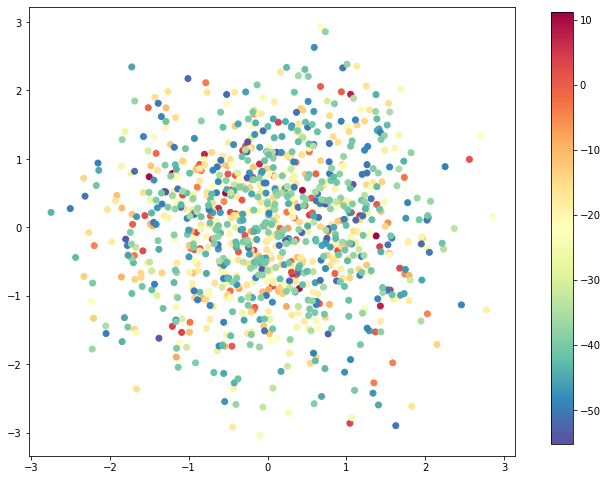

In [4]:
# Data
df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000), 'third':np.random.randn(1000).cumsum()})

# Choose how to plot
var1 = 'first'
var2 = 'second'
colorby = 'third'

# Scatter
fig = plt.figure(figsize=(10,8))        
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x=var1,y=var2,c=colorby,data=df,cmap=plt.cm.Spectral_r)
plt.subplots_adjust(left= None, bottom = 0.1, right = 0.8, top = None, wspace = None, hspace = None)

# Color bar
cbaxes = fig.add_axes([0.85, 0.12, 0.03, 0.75])
_ = plt.colorbar(scatter, cax = cbaxes)

#### Scatter with discrete color map

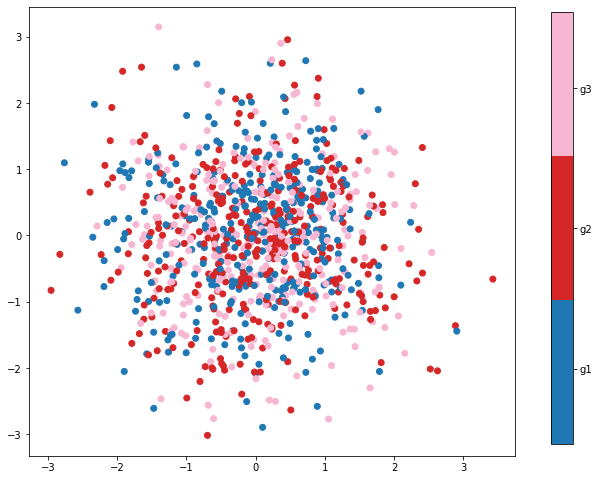

In [5]:
# Data
import matplotlib.colors as colors

df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000),'third':np.random.randint(1,4, size=1000)})
#mapping = {1:'g1', 2:'g2', 3:'g3'}
#df['third'] = df['third'].map(mapping)

# Choose how to plot
var1 = 'first'
var2 = 'second'
colorby = 'third'

# Colors
noofcolors = len(df[colorby].unique())
clrs = list(plt.cm.tab20(np.arange(0,1,1/noofcolors)))
#clrs = ['red', 'blue', 'orange']
cmap = colors.ListedColormap(clrs)

# Scatter
fig = plt.figure(figsize=(10,8))        
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(x=var1,y=var2,c=colorby,data=df,cmap=cmap)
plt.subplots_adjust(left= None, bottom = 0.1, right = 0.8, top = None, wspace = None, hspace = None)

# Color bar
cbaxes = fig.add_axes([0.85, 0.12, 0.03, 0.75])
cbar = fig.colorbar(scatter,cax = cbaxes)
cbar = fig.colorbar(scatter,cax = cbaxes,ticks=[1.35, 2, 2.65])
_ = cbar.ax.set_yticklabels(['g1','g2','g3'])

#### Multiple scatter with colormap in each

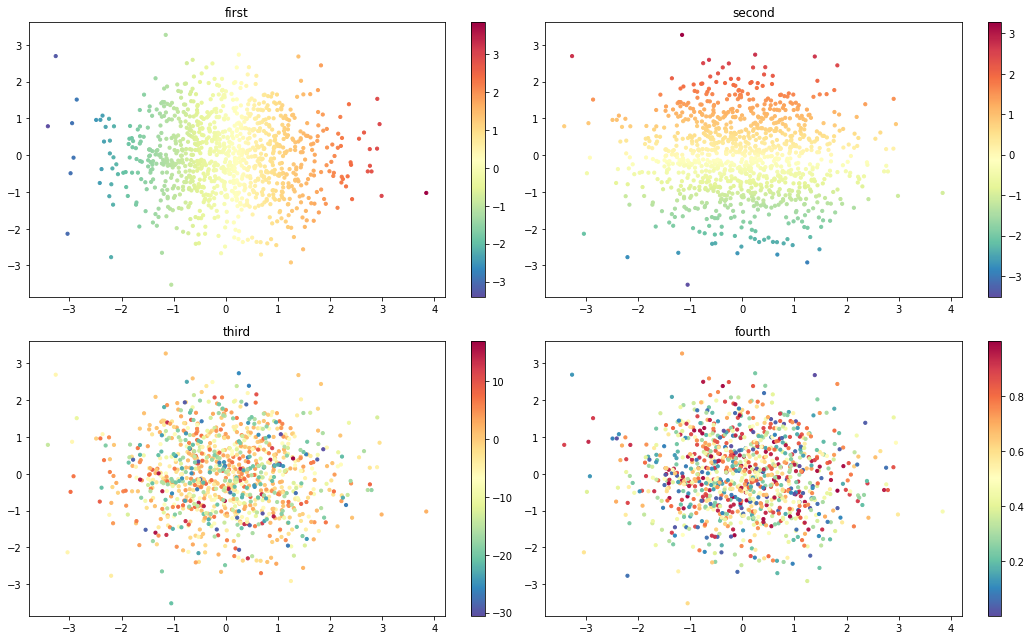

In [6]:
# Data
df = pd.DataFrame(data = {'first':np.random.randn(1000),'second':np.random.randn(1000)
                          ,'third':np.random.randn(1000).cumsum(), 'fourth':np.random.rand(1000)})

fig = plt.figure(figsize=(15,9))
colorby = df.columns

for i in range(0,len(colorby)):    
    ax = fig.add_subplot(2,2,i+1)
    scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], s=10, c = df[colorby[i]], cmap = plt.cm.Spectral_r)
    plt.colorbar(scatter, ax = ax)
    ax.set_title(colorby[i])    
    fig.tight_layout()

### Filled area chart

Text(0.5, 1.0, 'Title with Latex ($x^2$) ')

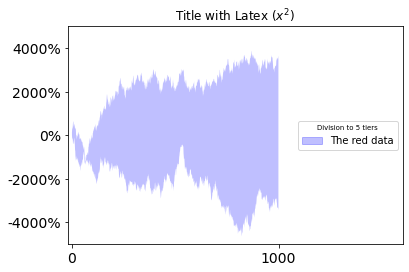

In [7]:
# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1,linewidth = 0)
ax1.plot(x,y2,alpha = 0)

# Fill area between two lines
ax1.fill_between(
    range(len(y1)), 
    y1,
    y2, 
    facecolor='blue', 
    alpha=0.25
)

# Axis limits
ax1.set_xlim(-20,1600)
ax1.set_ylim(-50,50)

# Control axis tick number
ax1.locator_params(axis='y', nbins=6)
ax1.locator_params(axis='x', nbins=2)

## If the above does not work, try this
#every_nth = 2
#for n, label in enumerate(ax.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)

# Tick label size
ax1.tick_params(axis='both', which='major', labelsize=14)

# legend 
red_patch = mpatches.Patch(color='blue', alpha = 0.25, label='The red data')
leg = ax1.legend(handles=[red_patch],loc=7, frameon = True, title='Legend')
leg.set_title("Division to 5 tiers", prop = {'size':'x-small'})

# Format y to percentages
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax1.set_title("Title with Latex ($x^2$) ")

### Histograms
- plt.his() produces half-open, left-inclusive bins. Right-inclusion needs to be hacked by adding a small value

#### Histogram where integral sums to 1

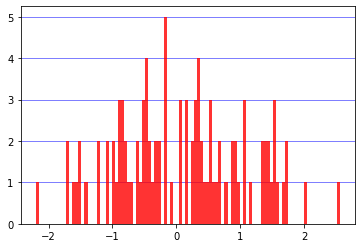

In [8]:
data = np.random.randn(100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data,bins=100, color = 'r', alpha=0.8)
# Grid
ax.grid(axis='y',color='blue', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

#### Histogram where bar heights sums to 1

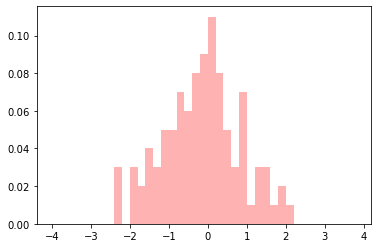

In [9]:
data = np.random.randn(100)
weights = np.ones_like(data)/float(len(data))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# hack for right-inclusion
bins = list(np.arange(-4.0, 4.0, 0.2))
bins = [x + 0.00000001 for x in bins]

_ = ax.hist(data, weights = weights, bins=bins, color = 'r', alpha=0.3)

#### Histogram over date counts

,date,val
0,2008-04-10,0
1,2008-04-15,1
2,2008-08-11,2
3,2008-12-12,3


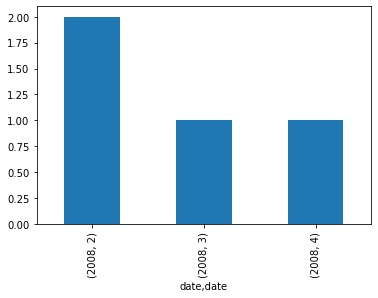

In [10]:
df = pd.DataFrame(np.arange(4), [pd.Timestamp('2008-04-10'), pd.Timestamp('2008-04-15'), pd.Timestamp('2008-08-11'), pd.Timestamp('2008-12-12')])
df.reset_index(inplace = True, drop = False)
df.columns = ['date', 'val']
display(df.head())
_ = df["date"].groupby([df["date"].dt.year, df["date"].dt.quarter]).count().plot(kind="bar")

### Bar chart

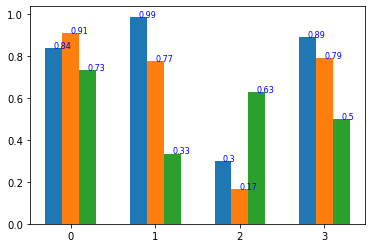

In [11]:
df = pd.DataFrame(np.random.rand(4,3), columns = ['ff', 'ee', 'tt'], index = [0,1,2,3])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(df.index - 0.2, df.iloc[:,0], width = 0.2)
ax.bar(df.index, df.iloc[:,1], width = 0.2)
ax.bar(df.index + 0.2, df.iloc[:,2], width = 0.2)
ax.set_xticks(df.index)
ax.set_xticklabels(map(str,df.index))

pos = -0.2
for h in range(2,-1,-1):
    for i, v in enumerate(df.iloc[:,h]):
        ax.text((i - pos) , v , str(round(v,2)), color='blue', fontsize = 8)
    pos += 0.2

## Plots from pandas dataframe

For practical work, plotting from pandas frame is often the way to go. Sometimes plotting directly using *pandas* causes odd problems with *matplotlib plots*. For example, plotting via *pandas* is pretty bad with [custom formatting of date tick labels](github.com/pandas-dev/pandas/issues/1918). Here we tackle some of the most common problems.

The example also shows how to span multiple subplots within one figure.

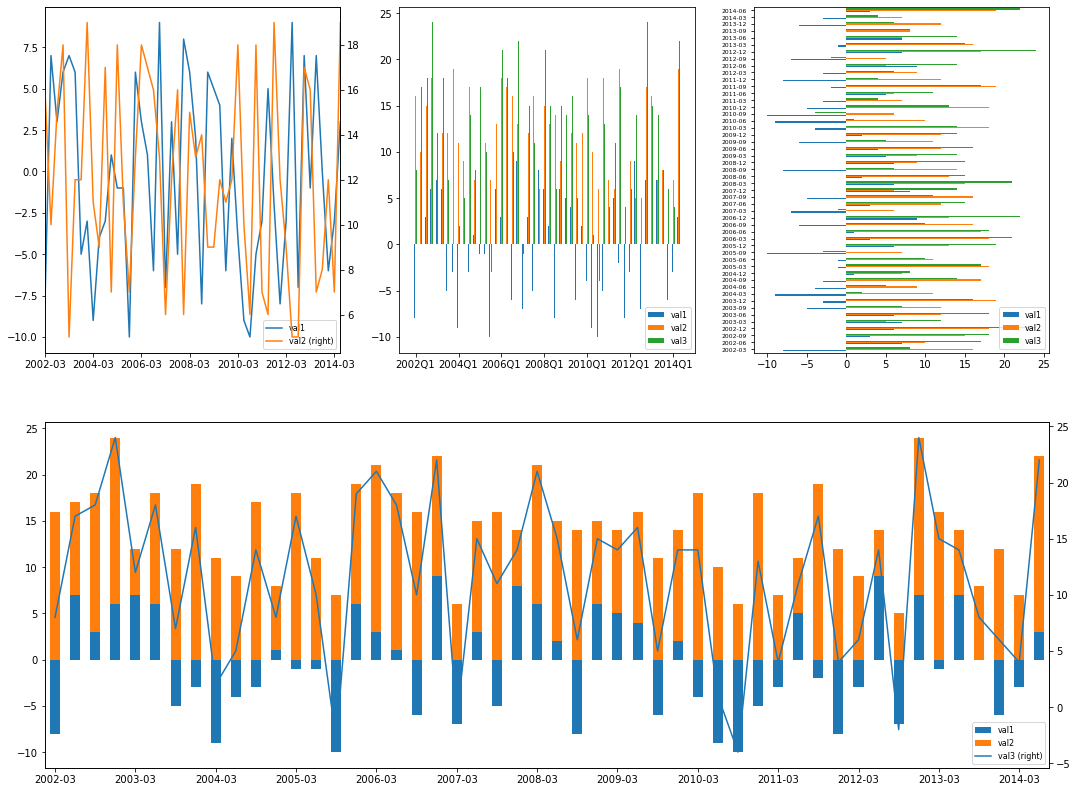

In [12]:
def legend_correction(ax):
    """Grab all existing legend handles for modification."""

    # Set "left" axis into a list
    axes = [ax]
    axes_names = ["ax"]
    # Is there a "right" axis in the axis object?
    if hasattr(ax, "right_ax"):
        # Does the right axis have a legend?
        if ax.right_ax.legend_ is not None:
            right_ax = ax.right_ax
            axes.append(right_ax)
            axes_names.append("right_ax")
    # Collect handles and labels
    handles = []
    labels = []
    for ax_crt, ax_name in zip(axes, axes_names):
        for h, l in zip(ax_crt.legend_.legendHandles, [t.get_text() for t in ax_crt.legend_.texts]):
            if ax_name=="right_ax":
                l = l + " (rhs)"
            handles.append(h)
            labels.append(l)
    # Set legend anew
    ax.legend(
        handles,
        labels,
        loc="lower right",
        prop={"size": 8},
    )    
    return ax

def time_tick_correction(ax, every_nth=4, start_from=0, **kwargs):
    """Correct x-axis ticks."""

    rotation = kwargs.get("rotation", 0)
    time_fmt = kwargs.get("time_fmt", "%Y-%m")
    xaxis = kwargs.get("xaxis", True)

    # Which axis is the time-axis?
    if xaxis:
        used_axis = ax.xaxis
    else:
        used_axis = ax.yaxis

    # Current tick labels as a series
    timelabels = pd.Series(
        [pd.to_datetime(x.get_text()) for x in used_axis.get_ticklabels()]
    )
    # Format labels
    if "%q" in time_fmt:
        # Due to a bug with quarters and strftime, manually deal with quarter-labels
        # https://stackoverflow.com/q/41369227
        # A hack to circumvent this:
        used_axis.set_major_formatter(plt.FixedFormatter(timelabels.dt.to_period("Q")))
    else:
        used_axis.set_major_formatter(plt.FixedFormatter(timelabels.dt.strftime(time_fmt)))
    # Get labels
    labels = used_axis.get_ticklabels()
    ticks = used_axis.get_major_ticks()
    # Set the labels anew
    _ = [l.set_visible(False) for i, l in enumerate(labels)]
    _ = [t.set_visible(False) for i, t in enumerate(ticks)]
    _ = [l.set_visible(True) for i, l in enumerate(labels[start_from::every_nth])]
    _ = [t.set_visible(True) for i, t in enumerate(ticks[start_from::every_nth])]
    ax.tick_params(axis="x", rotation=rotation)

    return ax

# Data
df = pd.DataFrame(
    data={
        "val1": np.random.randint(low=-10, high=10, size=50, dtype='l'),
        "val2": np.random.randint(low=5, high=20, size=50, dtype='l'),
    },
    index=pd.date_range(start='2002-01-01', periods=50, freq='Q')
)
df["val3"] = df["val1"] + df["val2"]

fig = plt.figure(figsize=(18, 14))

###############
# Top-left axis
# Here datetime plotting works wll out-of-the-box. However, xticks are automatically
# limited (months converted to Jan, Feb etc.) and we might want to change that.
###############
ax = plt.subplot2grid((2, 3), (0, 0), colspan=1)
df[["val1"]].plot(ax=ax)
df[["val2"]].plot(ax=ax, secondary_y=True)
ax = legend_correction(ax)
# Stop automatic xticks limiting...
plt.xticks(df.index)
ax.set_xticklabels(df.index)
plt.setp(ax.get_xminorticklabels(), visible=False)
# ...and now fix the issue of too many ticks appearing
ax = time_tick_correction(ax, every_nth=8)

###############
# Top-center axis
###############
ax = plt.subplot2grid((2, 3), (0, 1), colspan=1)
df.plot.bar(ax=ax)
ax = time_tick_correction(ax, every_nth=8, time_fmt="%Y-%q")
ax = legend_correction(ax)
# Fix pandas not leaving enough space to left and right
xmargin = 0.05
x0, x1 = ax.get_xlim()
ax.set_xlim(x0-xmargin*(x1-x0), x1+xmargin*(x1-x0))

###############
# Top-right axis
###############
ax = plt.subplot2grid((2, 3), (0, 2), colspan=1)
df.plot.barh(ax=ax, use_index=True)
ax = time_tick_correction(ax, every_nth=1, time_fmt="%Y-%m", xaxis=False)
ax.tick_params(axis="y", which="major", labelsize=6)
_ = legend_correction(ax)

###############
# Bottom axis
###############
ax = plt.subplot2grid((2, 3), (1, 0), colspan=3)
df[["val1", "val2"]].plot.bar(ax=ax, stacked=True)
df[["val3"]].plot(ax=ax, secondary_y=True, use_index=False)
ax._shared_x_axes.remove(ax) # Stop sharing x-axis with others
ax = time_tick_correction(ax)
ax = legend_correction(ax)

# Sometimes auto date tick formatter works, but not here with multiple axes
#fig.autofmt_xdate()

In [13]:
# Formatted time axis might ahve lost the underlying time information
# and is simply given by integers woth formatted labes. Map the ticks
# back to original time points (or to their string counterparts)
print("Formatted xticks in the latest axis are: {}".format(ax.get_xticks()))
ticklabels_and_positions = dict(
    [(val, key) for key, val in zip(
        df.reset_index()["index"].sort_values().unique(), # datetime
        #df.reset_index()["index"].sort_values().dt.strftime("%Y-%m").unique(), # string counterparts
        range(len(df.reset_index()["index"].unique()))
    )]
)
print("Ticks mapped back to datetime (first observations):")
pd.Series(ticklabels_and_positions).head(5)

Formatted xticks in the latest axis are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Ticks mapped back to datetime (first observations):


0   2002-03-31
1   2002-06-30
2   2002-09-30
3   2002-12-31
4   2003-03-31
dtype: datetime64[ns]

## Fancier examples

### Sample mean bars with colouring depending on confidence

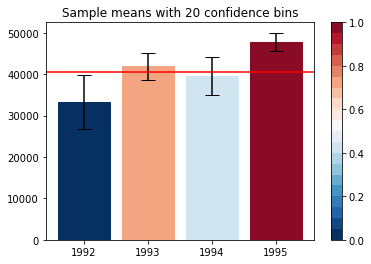

In [14]:
def plot_bars(df, uservalue):
    '''
    df: DataFrame containing data
    uservalue: value for horizontal line
    confint = 1 - confidence level
    '''
    
    confint = 0.95
    quantiles = 20
    
    # Define color map
    nobars = len(df)
    cmap = plt.cm.RdBu
    
    # Discretize color map (and reverse it)
    step = 1.0 / float(quantiles); val = 0; colors = []
    for _ in range(quantiles):
        val = math.floor((val + step) * 100) / 100
        colors.append(cmap(val))
        
    cmap = cmap.from_list('Custom cmap', colors[::-1], quantiles)    
    
    err = []
    tups = []
    for i in range(len(df)):
        a = df.iloc[i,]
        # End-points of conflev confidence intervals
        tup = st.norm.interval(confint, loc = a.mean(), scale = st.sem(a))
        tups.append(tup)
        err.append(a.mean() - tup[0])
    
    # Determine how big of a portion of the confidence interval uservalue covers
    barcolors = [np.nan] * nobars

    for j in range(nobars):
        # If uservalue less than starting point of confidence interval
        if uservalue < tups[j][0]:

            barcolors[j] = colors[0]
            
        # If uservalue equal or greater than ending point of confidence interval            
        elif uservalue >= tups[j][1]:

            barcolors[j] = colors[quantiles-1]        
        else:
            
            pct = (uservalue - tups[j][0]) / (tups[j][1] - tups[j][0])
            barcolors[j] = colors[int(round(pct*20))-1]

    # Figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Dummy scatter data in order to have color bar
    y = np.array([0, 1])
    scat = ax.scatter(y, y, c = y, cmap = cmap)
    ax.cla() # clear dummy data
    
    # Color bar on cleared dummy data
    plt.colorbar(scat)
    
    # Actual bars
    bars = ax.bar(df.index, df.mean(axis = 1), yerr = err, capsize = 7)
    for h in range(len(bars)):
        bars[h].set_color(barcolors[h])
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index.values.tolist())
    
    # Horizontal line
    ax.axhline(y = uservalue, color = 'red')
    
    ax.set_title('Sample means with ' + str(quantiles) + ' confidence bins')

    return(fig)

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])

fig = plot_bars(df, 40500)

### 3D scatter plot

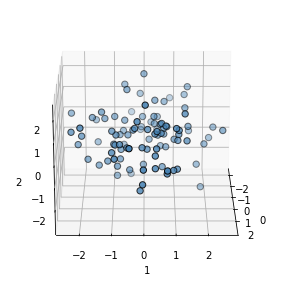

In [15]:
def scatter3D(df,**kwargs):
    """
    Function to plot 3D scatter plot.
    Takes as innput a pandas data frame with shape (x, 3).    
    """
    from mpl_toolkits.mplot3d import Axes3D
    if df.shape[1] != 3:
        raise ValueError('Data frame does not have three columns.')
    
    figsize       = kwargs.get('figsize',(9,5))
    edgecolor     = kwargs.get('edgecolor','k')
    scatter_s     = kwargs.get('scatter_s', 40)
    title         = kwargs.get('title', None)
    xlabel        = kwargs.get('xlabel', df.columns[0])
    ylabel        = kwargs.get('ylabel', df.columns[1])
    zlabel        = kwargs.get('zlabel', df.columns[2])
    azim          = kwargs.get('azim', 0)
    elev          = kwargs.get('elev', 20)
    xlim          = kwargs.get('xlim',None)
    ylim          = kwargs.get('ylim',None)
    zlim          = kwargs.get('zlim',None) 
    color         = kwargs.get('color',"steelblue")
    cmap          = kwargs.get('cmap',None)    
    return_plot   = kwargs.get('return_plot', True)    

    ###################################
    # Core plot
    ###################################        
    fig = plt.figure(figsize=figsize)        
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], 
               edgecolor = edgecolor, s=scatter_s, c = color, cmap=cmap)    
    ax.view_init(azim = azim, elev = elev)
    
    ###################################
    # Stylings
    ###################################
    if title is not None:
        ax.set_title(title)    
    if xlabel != 'none':
        ax.set_xlabel(xlabel)
    if ylabel != 'none':
        ax.set_ylabel(ylabel)
    if zlabel != 'none':
        ax.set_zlabel(zlabel)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if zlim != None:
        ax.set_zlim(zlim)
        
    ###################################
    # Return
    ###################################    
    if return_plot == True:
        return fig, ax
    
df = pd.DataFrame(np.random.randn(100,3))
scatter3D(df, return_plot = False)